In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

<AxesSubplot:>

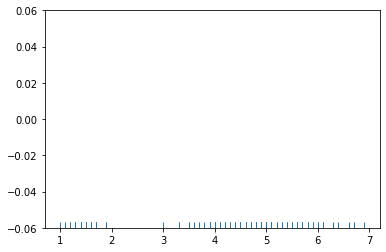

In [5]:
x=iris.petal_length.values

sns.rugplot(x)

<AxesSubplot:ylabel='Density'>

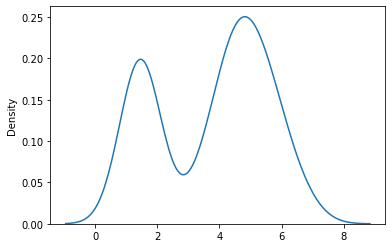

In [6]:
sns.kdeplot(x)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

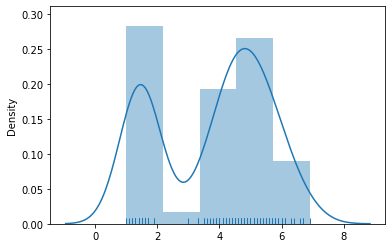

In [7]:
sns.distplot(x, rug=True)

In [8]:
#countplot은 데이터프레임에 대해서 사용 가능

<AxesSubplot:xlabel='class', ylabel='count'>

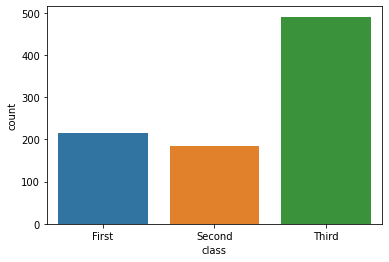

In [9]:
sns.countplot(x='class', data=titanic)

<AxesSubplot:xlabel='day', ylabel='count'>

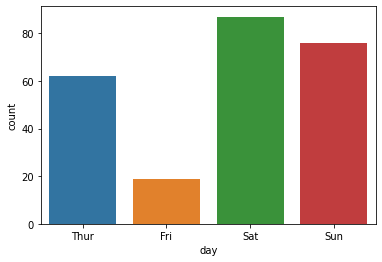

In [10]:
tips
sns.countplot(x='day', data=tips)

In [13]:
#데이터가 2차원, 실수 => 스캐터 플롯
#스캐터플롯 + 히스토그램 => 조인트 플롯

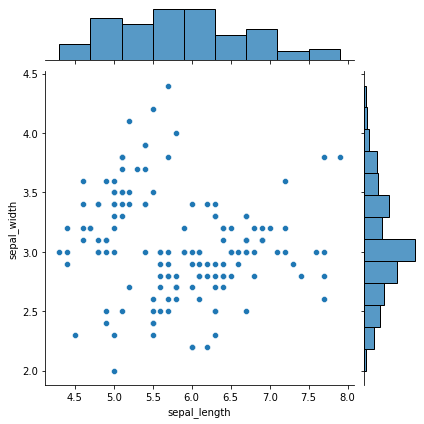

In [14]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

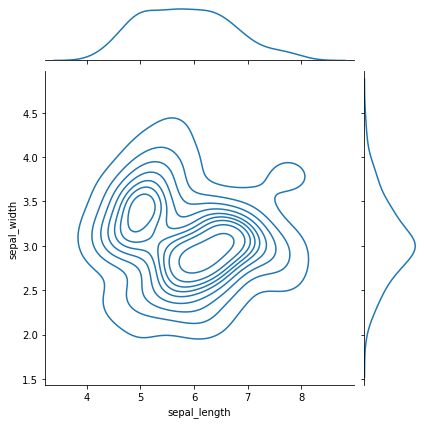

In [15]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")

In [16]:
#데이터 2차원 + 카테고리형 => heatmap

In [17]:
#titanic.groupby(['class','sex']).count().unstack()
# a=titanic.groupby(['class','sex'])['survived'].sum()
# a.unstack('sex')
titanic.groupby(['class','sex']).size().unstack()

#퀴즈1
# sex     fem    male
# class
# f        94     122
# s           ...
# t           ...

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


In [20]:
titanic.pivot_table(index='class', columns='sex', aggfunc='count') #default : mean함수
#titanic.groupby(['class','sex']).count().unstack()
ts=titanic.pivot_table(index='class', columns='sex', aggfunc='size')
ts

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


Text(0.5, 1.0, 'my heatmap')

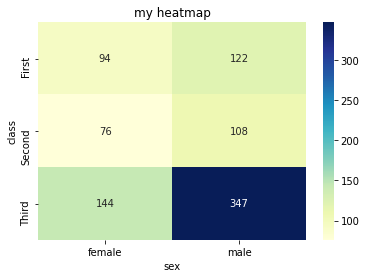

In [28]:
ts
sns.heatmap(ts, annot=True, fmt="d",cmap="YlGnBu")  #annot =True: True이면 셀 내부의 데이터 값 보여줌

plt.title("my heatmap")
#http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [29]:
#2차원, 실수, 카테고리가 섞여있는 데이터 시각화

<AxesSubplot:xlabel='day', ylabel='total_bill'>

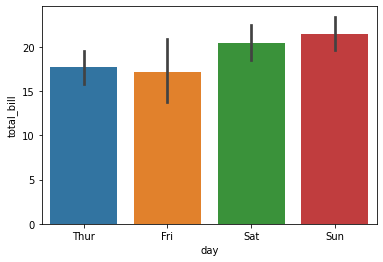

In [30]:
sns.barplot(x="day", y="total_bill", data=tips)
#평균:막대의 높이, 에러바:편차

<AxesSubplot:xlabel='day', ylabel='total_bill'>

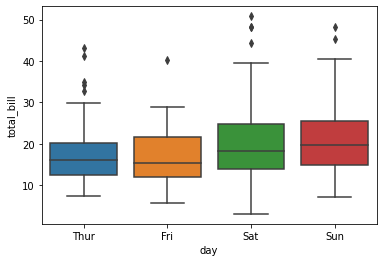

In [31]:
sns.boxplot(x="day", y="total_bill", data=tips)
#outliers:이상치, 극단치, 예외치
# iqr=q3(3사분위수)-q1(1사분위수)
# maximum = q3+iqr*1.5
# minimum = q1-iqr*1.5
#https://en.wikipedia.org/wiki/Interquartile_range

<AxesSubplot:xlabel='day', ylabel='total_bill'>

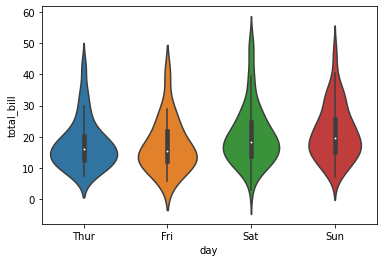

In [32]:
sns.violinplot(x="day", y="total_bill", data=tips)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

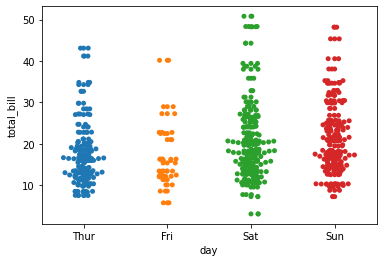

In [34]:
sns.stripplot(x="day", y="total_bill", data=tips)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
#jitter=True 겹친 데이터를 겹치지 않도록 설정

sns.swarmplot(x="day", y="total_bill", data=tips)


In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

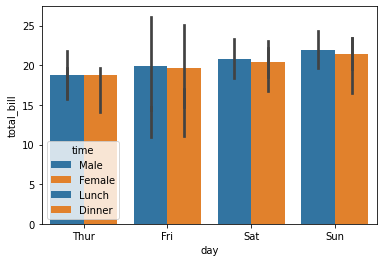

In [38]:
sns.barplot(x="day", y="total_bill", data=tips, hue="sex")
sns.barplot(x="day", y="total_bill", data=tips, hue="time")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

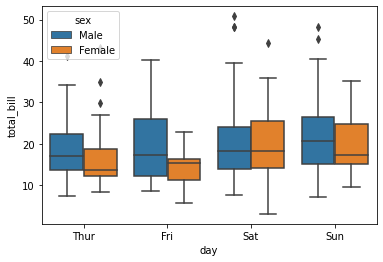

In [39]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex")

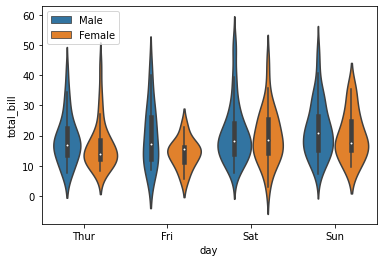

In [42]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex")
plt.legend(loc=2)

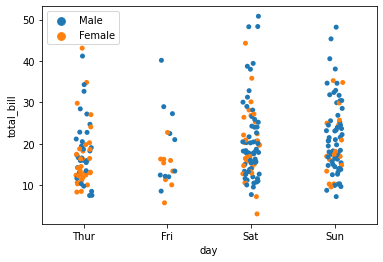

In [41]:
sns.stripplot(x="day", y="total_bill", data=tips, hue="sex")
plt.legend(loc=2)

In [43]:
flights
#연도별, 월별 승객수 heatmap
fp=flights.pivot("month", "year", "passengers")
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

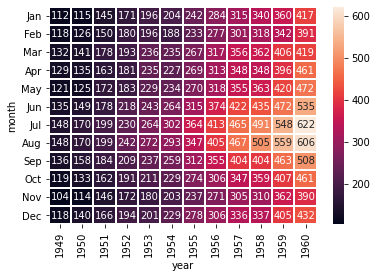

In [45]:
sns.heatmap(fp, annot=True, fmt="d", linewidths=1) #fmt="d": 해당 값을 어떻게 나타낼지(d:정수형)

In [46]:
#시각화시 막대그래프 그리는 방법(seaborn, matplotlib, pandas, ggplot2)

In [47]:
import random

In [48]:
np.random.seed(331)

In [49]:
groupList=['A','B','C','D']
nSize=20

In [50]:
group=[random.choice(groupList) for i in range(nSize)]
group

['A',
 'A',
 'D',
 'C',
 'B',
 'B',
 'B',
 'D',
 'D',
 'A',
 'B',
 'A',
 'C',
 'D',
 'D',
 'B',
 'C',
 'D',
 'B',
 'C']

In [55]:
xval=np.random.poisson(lam=10, size=nSize)
#포아송 분포로부터 무작위 표본 추출
#일정 시간(공간)에서 무작위로 발생하는 사건의 평균 회수가 람다(lam)가
#10인 포아송 분포로부터 난수를 20개 추출아송 분포로부터 난수를 20개 추출
xval

array([13,  9, 13,  7, 11,  8,  6, 12,  9,  5, 12, 12,  8, 12, 12,  7, 13,
        6, 14,  8])

In [52]:
label=np.random.binomial(n=1, p=0.5, size=nSize)
#1:반복횟수, 0.5:성공확률, nSize:시행횟수
#ex) 동전: 1번 던지면 뒷면(0)/앞면(1), 20번 반복


label
#이항분포에서 무작위 표본 추출
#이항분포?실험을 반복적으로 시행-> 두 가지 경우(성공/실패, 베르누이 시행)
# 성공확률 p인 베르누이 시행을 n번 반복했을 때 
# 성공하는 횟수를 x, 확률 변수 x는 모수 n과 p의 이항분포를
# 따른다

#확률분포 : 이산형, 연속형 확률 분포
#이산형 확률 분포: 이항분포, 포아송분포, 초기하 분포
#연속 확률 분포 : 정규분포, t분포, f분포, 카이제곱,..


array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [53]:
label=list(map(str, label))

In [54]:
label

['1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1']

In [57]:
xval
label
df=pd.DataFrame({"xval":xval, "group":group,"label":label})
df

#퀴즈2
#group 컬럼을 기준으로 그룹화 한 다음 xval의 합계
# group
# A     xx
# B     xx
# ...   ...
df.pivot_table(index='group', aggfunc='sum')
df_group=df.groupby('group')[['xval']].sum()
df_group_label=df.groupby(['group','label'])[['xval']].sum()
df_group_label
df_group


,xval
group,
A,39
B,58
C,36
D,64


In [58]:
df_group=df_group.reset_index()
df_group

,group,xval
0,A,39
1,B,58
2,C,36
3,D,64


<AxesSubplot:ylabel='group'>

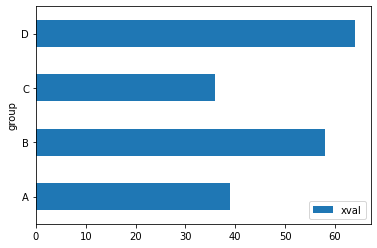

In [61]:
#pd.DataFrame.plot.bar()

#df_group.plot.bar(x="group", y="xval",rot=0)
#df_group.plot.barh(x="group", y="xval",rot=0)


In [62]:
df_group_label=df_group_label.reset_index()
df_pivot=df_group_label.pivot(index='group', columns='label', values='xval')
df_pivot

label,0,1
group,,
A,17,22
B,40,18
C,28,8
D,37,27


<AxesSubplot:xlabel='group'>

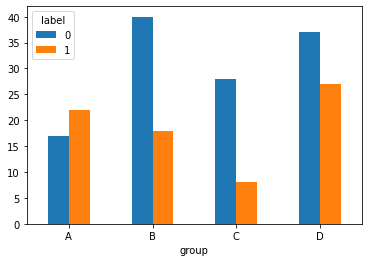

In [63]:
df_pivot.plot.bar(rot=0)

<AxesSubplot:xlabel='group'>

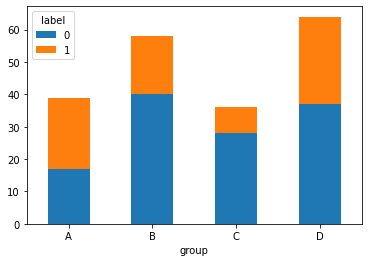

In [64]:
df_pivot.plot.bar(rot=0, stacked=True)

In [65]:
#matplotlib으로 시각화

In [66]:
df_group
#df_group_label

,group,xval
0,A,39
1,B,58
2,C,36
3,D,64


In [67]:
df_group=df.groupby(['group'])['xval'].sum()
df_group

group
A    39
B    58
C    36
D    64
Name: xval, dtype: int64

In [76]:
label=df_group.index
label

Index(['A', 'B', 'C', 'D'], dtype='object', name='group')

In [69]:
index=np.arange(len(label))
index

array([0, 1, 2, 3])

([<matplotlib.axis.XTick at 0x7fef886eaa00>,
 [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C'), Text(3, 0, 'D')])

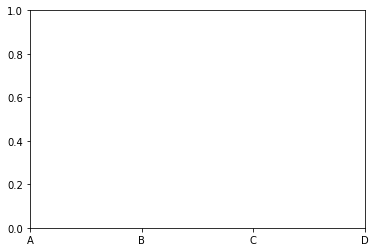

In [74]:
#plt.bar(index, df_group)
plt.xticks(index, label)

([<matplotlib.axis.YTick at 0x7fef887b00a0>,
 [Text(0, 0, 'A'), Text(0, 1, 'B'), Text(0, 2, 'C'), Text(0, 3, 'D')])

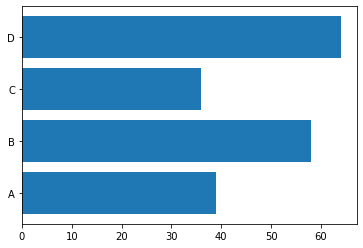

In [77]:
plt.barh(index, df_group)
plt.yticks(index, label, fontsize=10)

In [78]:
df
# x축:group
# y축:xval 합계
# 막대바:label(0,1

,xval,group,label
0,13,A,1
1,9,A,1
2,13,D,0
3,7,C,0
4,11,B,1
5,8,B,0
6,6,B,0
7,12,D,1
8,9,D,1
9,5,A,0


In [79]:
df[df['label']=='0']
df_group0=df[df['label']=='0'].groupby(['group'])['xval'].sum()
df_group1=df[df['label']=='1'].groupby(['group'])['xval'].sum()
df_group0
df_group1

group
A    22
B    18
C     8
D    27
Name: xval, dtype: int64

In [84]:
label=df.group.unique()
label
index=np.arange(len(label))
index



array([0, 1, 2, 3])

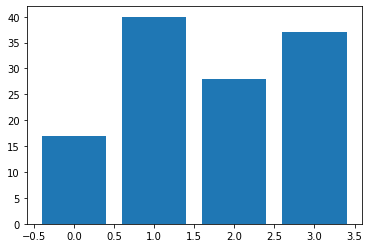

In [85]:
p1=plt.bar(index, df_group0)


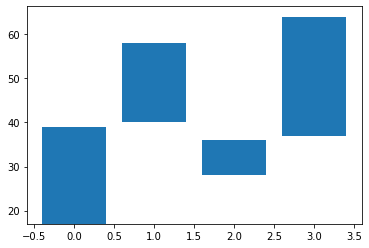

In [86]:
p2=plt.bar(index, df_group1, bottom=df_group0)

([<matplotlib.axis.XTick at 0x7fef88c03160>,
 [Text(0, 0, 'A'), Text(1, 0, 'D'), Text(2, 0, 'C'), Text(3, 0, 'B')])

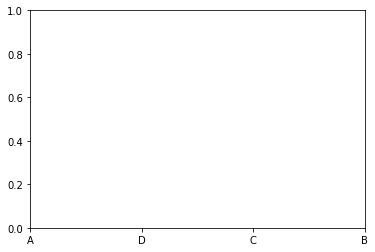

In [87]:
plt.xticks(index, label)

In [89]:
index

array([0, 1, 2, 3])

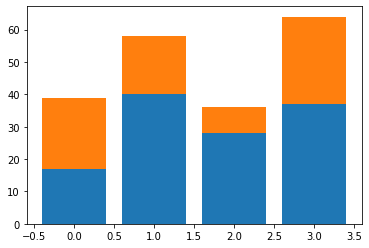

In [93]:
p1=plt.bar(index, df_group0)
p2=plt.bar(index, df_group1, bottom=df_group0)




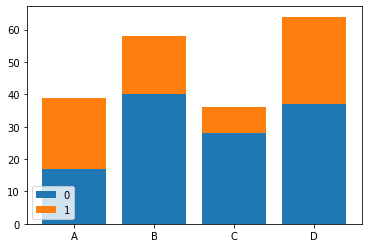

In [92]:
# x축:group
# y축:xval 합계
# 막대바:label(0,1)
label=df.group.unique()
label=sorted(label)
index=np.arange(len(label))
#index

p1=plt.bar(index, df_group0)
p2=plt.bar(index, df_group1, bottom=df_group0)
plt.xticks(index, label)
plt.legend((p1[0],p2[0]), ('0','1'), fontsize=10, loc=3)

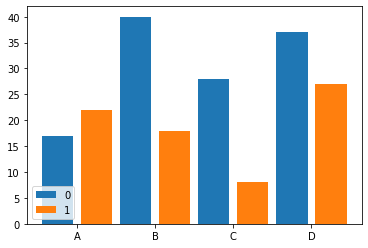

In [96]:
p1=plt.bar(index, df_group0, width=0.4)
p2=plt.bar(index+0.5, df_group1, width=0.4)
plt.xticks(index+0.25, label)
plt.legend((p1[0],p2[0]), ('0','1'), fontsize=10, loc=3)

In [97]:
#seaborn 을 이용한 바 그래프 출력

In [98]:
df_group=df.groupby(['group'])['xval'].sum().reset_index()
df_group

,group,xval
0,A,39
1,B,58
2,C,36
3,D,64


<AxesSubplot:xlabel='group', ylabel='xval'>

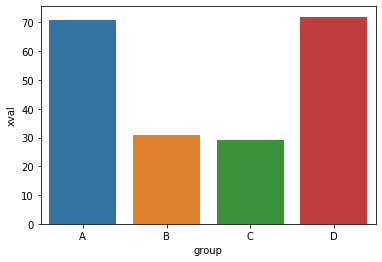

In [222]:
sns.barplot(x='group',y='xval', data=df_group)

In [99]:
df_group_label=df.groupby(['group', 'label'])['xval'].sum().reset_index()
df_group_label

,group,label,xval
0,A,0,17
1,A,1,22
2,B,0,40
3,B,1,18
4,C,0,28
5,C,1,8
6,D,0,37
7,D,1,27


In [100]:
df_group_label

,group,label,xval
0,A,0,17
1,A,1,22
2,B,0,40
3,B,1,18
4,C,0,28
5,C,1,8
6,D,0,37
7,D,1,27


<AxesSubplot:xlabel='group', ylabel='xval'>

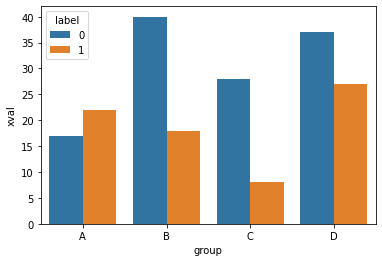

In [101]:
sns.barplot(x='group', y='xval', data=df_group_label, hue='label')

In [102]:
df

,xval,group,label
0,13,A,1
1,9,A,1
2,13,D,0
3,7,C,0
4,11,B,1
5,8,B,0
6,6,B,0
7,12,D,1
8,9,D,1
9,5,A,0


In [103]:
df_group0=df[df['label']=='0'].groupby(['group'])['xval'].sum().reset_index()
df_group1=df[df['label']=='1'].groupby(['group'])['xval'].sum().reset_index()

In [104]:
df_group0
df_group1

,group,xval
0,A,22
1,B,18
2,C,8
3,D,27


In [105]:
df_group

,group,xval
0,A,39
1,B,58
2,C,36
3,D,64


<AxesSubplot:xlabel='group', ylabel='xval'>

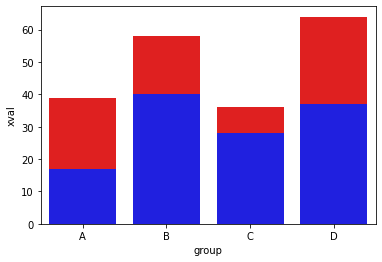

In [107]:
sns.barplot(x='group', y='xval', data=df_group, color='red')
sns.barplot(x='group', y='xval', data=df_group0, color='blue')
#df_group이 전체 데이터를 group별로 빨간색 막대바로 출력
#df_group0를 df_group그래프 위에 덧씌운것(파랑색)

In [108]:
# R에서 사용되는 ggplot2를 사용하기

In [247]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [109]:
import plotnine as p9

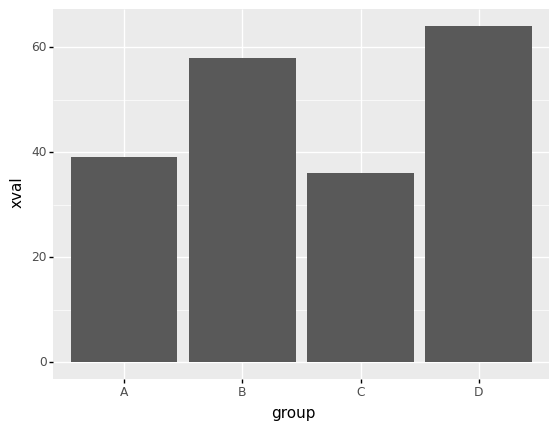

<ggplot: (8791643366473)>

In [113]:
p9.ggplot(data=df, mapping=p9.aes(x='group', y='xval'))+p9.geom_bar(stat='identity')

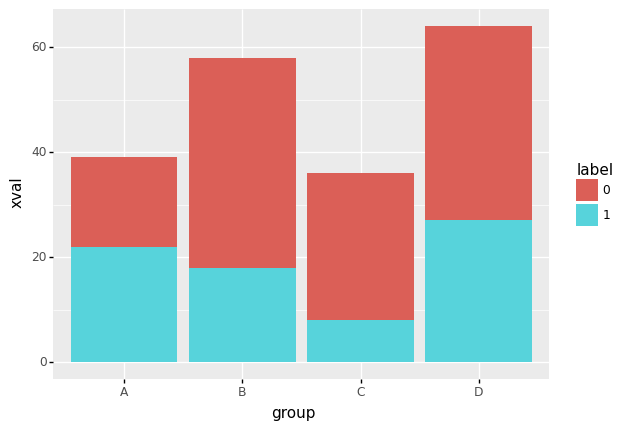

<ggplot: (8791644773882)>

In [114]:
p9.ggplot(data=df, mapping=p9.aes(x='group', y='xval', fill='label'))+p9.geom_bar(stat='identity')

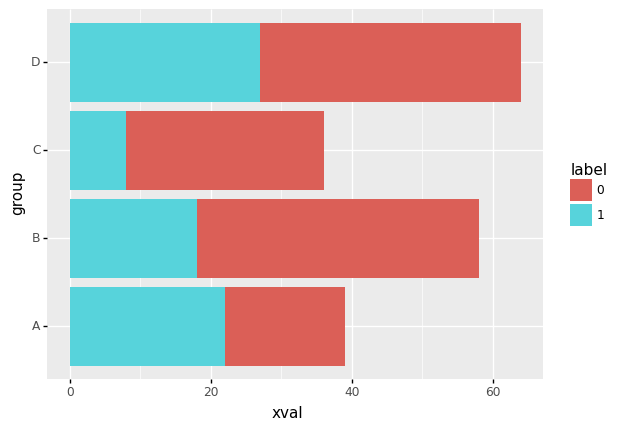

<ggplot: (8791644814842)>

In [115]:
p9.ggplot(data=df, mapping=p9.aes(x='group', y='xval', fill='label'))+p9.geom_bar(stat='identity')+p9.coord_flip()

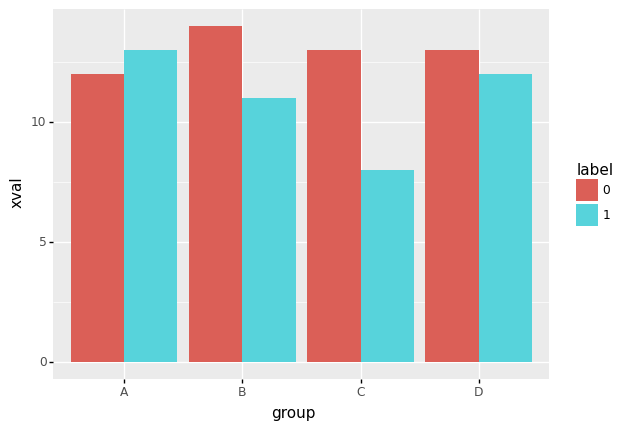

<ggplot: (8791643370475)>

In [116]:
p9.ggplot(data=df, mapping=p9.aes(x='group', y='xval', fill='label'))+p9.geom_bar(stat='identity', position='dodge')

In [117]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1

,A,B,C
2018-01-01,1.764052,0.400157,0.978738
2018-01-02,4.004946,2.267715,0.001460
2018-01-03,4.955034,2.116358,-0.101759
2018-01-04,5.365632,2.260402,1.352515
2018-01-05,6.126670,2.382077,1.796378
...,...,...,...
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465


In [261]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44036 missing from current font.


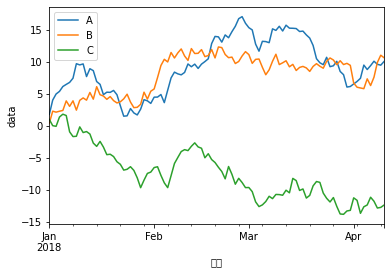

In [118]:
df1.plot()
plt.xlabel("시간")
plt.ylabel("data")
plt.show()

<AxesSubplot:>

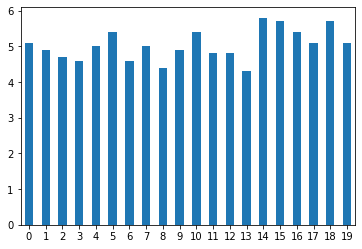

In [119]:
iris.sepal_length[:20].plot(kind='bar', rot=0)
#시리즈.plot()

Text(0, 0.5, 'data')

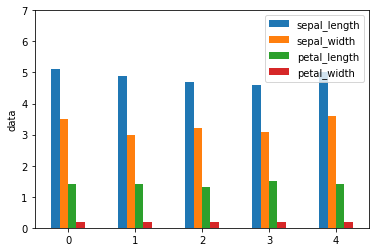

In [120]:
#iris[:5].plot(kind='bar', rot=0) #x축:데이터index번호, y축:수치
#데이터프레임.plot()
iris[:5].plot.bar(rot=0)
plt.ylim(0,7)
plt.ylabel("data")

In [123]:
#종별 각 feature 평균을 시각화
#x축 3가지 종, y축 종별로 각 특징값의 평균을 막대바(4개)로 출력
#행 인덱스=종, 열 인덱스=각 특징이름, 데이터=평균
df2=iris.groupby(iris.species).mean()
df2.columns.name="feature"
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<AxesSubplot:xlabel='feature'>

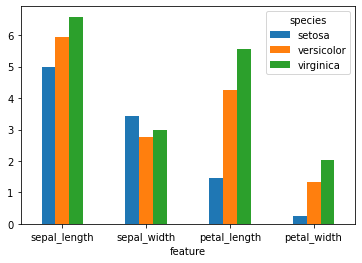

In [124]:
df2.T.plot.bar(rot=0)

<AxesSubplot:xlabel='species'>

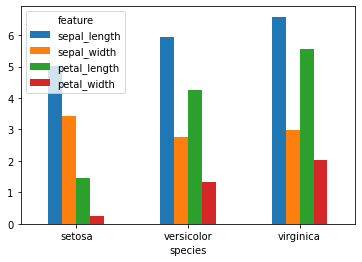

In [125]:
df2.plot.bar(rot=0)

In [126]:
df3=titanic.pclass.value_counts()
#선실별 승객 비율
df3

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot:ylabel='pclass'>

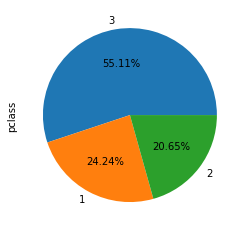

In [127]:
df3.plot.pie(autopct="%.2f%%")

<AxesSubplot:ylabel='Frequency'>

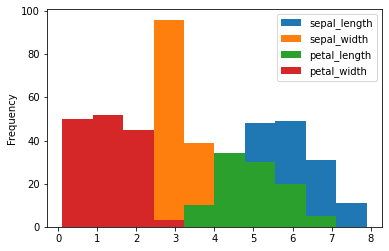

In [128]:
iris.plot.hist()

<AxesSubplot:ylabel='Density'>

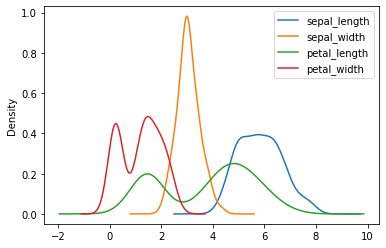

In [129]:
iris.plot.kde()

<AxesSubplot:>

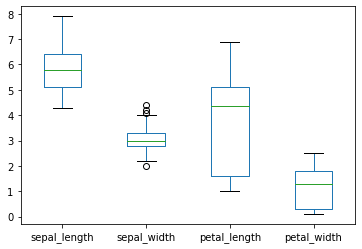

In [130]:
iris.plot.box()

<AxesSubplot:>

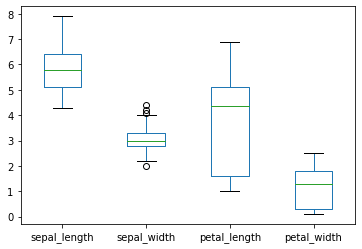

In [131]:
iris.plot.box()

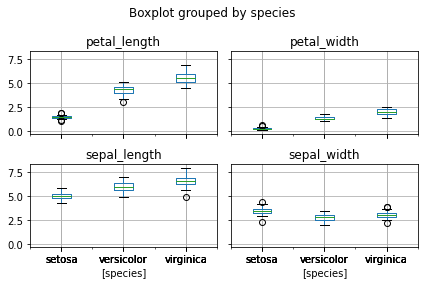

In [132]:
iris.boxplot(by='species')
plt.tight_layout()
plt.show()

In [133]:
#미국에서 태어난 아이 이름 분석(1880~2010)

In [315]:
names1880=pd.read_csv("babynames/yob1880.txt", header=None, names=['name', 'sex', 'births'])
names1880
#퀴즈3
#names1880에서 성별에 따른 태어난 아이들 수 수의 합계 출력
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [317]:
#1880~2010 : 데이터프레임 131개 -> 연결 -> 리스트의 요소로 저장

In [322]:
years=range(1880,2011)
pieces=[]

In [323]:
for year in years:
    path="babynames/yob%d.txt" % year
    frame=pd.read_csv(path, header=None, names=['name', 'sex', 'births'])
    frame['year']=year
    pieces.append(frame)
    #print(frame)
    #print(path)

In [335]:
len(pieces[0][pieces[0].sex=='F']) #942
len(pieces[130][pieces[130].sex=='F']) #19698
#1880년 여자 아이들의 이름의 종류:942,
#2010년 여자 아이들의 이름의 종류:19698
#이름이 매우 다양해졌다
#시각화()

942

In [325]:
len(pieces)

131

In [328]:
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [329]:
#1.
#연도 및 성별로 그룹화 -> 태어난 아이의 수 -> 시각화
#선그래프(남/여)
#x축 year, y축  태어난 아이의 수 합계

#2.
# names에 prop열 추가
# prop열은 연도별 각각의 이름에 해당되는 아이의 수 /  연도에 태어난 전체 아이의 수
# ex) 1880년 전체 아이의 수 100명, john이름 아이의 수 5명
# prop=5/100= 0.05

#3.
# names에서 연도별, 성별 가장 많은 이름을 1000개씩 추출
# 1880년 여자 메리, 애나,....마린
# 1880년 남자 존, 마이클,....

In [ ]:
#4
#John, Mary, Harry 이름의 유행 변화 ???
# John, Mary, Harry에 대해 시각화(선 그래프)
# x축 year, y축 태어난아이의수


In [ ]:
#이름의 다양성 변화?  분석(여러분의 아이디어)
#1880년 여자 아이들의 이름의 종류:942,
#2010년 여자 아이들의 이름의 종류:19698
#이름이 매우 다양해졌다
#시각화, x축 year, y축 이름의 종류 수, 선그래프, 성별